In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from __future__ import division
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [2]:
df = pd.read_csv('dataset/creditcard.csv')

In [3]:
count_normal_transacation = len(df[df["Class"]==0]) # normal transaction are repersented by 0
count_fraud_transacation = len(df[df["Class"]==1]) # fraud by 1
fraud_indices = np.array(df[df.Class==1].index)
normal_indices = np.array(df[df.Class==0].index)

#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data

def undersample(normal_indices, fraud_indices, multiple): # multiple denote the normal data = multiple * fraud data
    normal_indices_undersample = np.array(np.random.choice(normal_indices,(multiple*count_fraud_transacation),replace=False))
    undersample_data = np.concatenate([fraud_indices, normal_indices_undersample])
    undersample_data = df.iloc[undersample_data,:]
    
    print "the normal transacation proportion is :", len(undersample_data[undersample_data.Class==0])/len(undersample_data)
    print "the fraud transacation proportion is :", len(undersample_data[undersample_data.Class==1])/len(undersample_data)
    print "total number of record in resampled data is:",len(undersample_data)
    return(undersample_data)

In [15]:
def prediction_algorithms(model,features_train,features_test,labels_train,labels_test):
    model.fit(features_train,labels_train.values.ravel())
    pred = model.predict(features_test)
    cm = confusion_matrix(labels_test,pred)
    print "the recall for this model is :",cm[1,1] / (cm[1,1] + cm[1,0])
    print "The accuracy is :", (cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print "TP",cm[1,1] # no of fraud transaction which are predicted fraud
    print "TN",cm[0,0] # no. of normal transaction which are predited normal
    print "FP",cm[0,1] # no of normal transaction which are predicted fraud
    print "FN",cm[1,0] # no of fraud Transaction which are predicted normal
    sns.heatmap(cm, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print "Classification Report:" 
    print(classification_report(labels_test,pred))

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.8916666666666667
The accuracy is : 0.9772478301171316
TP 107
TN 69475
FP 1607
FN 13


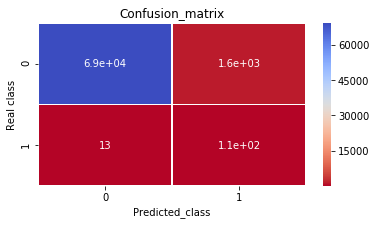

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     71082
          1       0.06      0.89      0.12       120

avg / total       1.00      0.98      0.99     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.8166666666666667
The accuracy is : 0.9940872447403163
TP 98
TN 70683
FP 399
FN 22


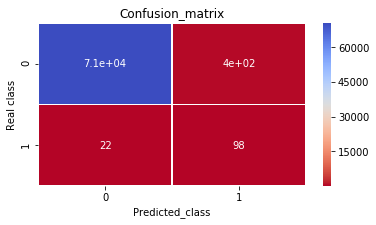

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.20      0.82      0.32       120

avg / total       1.00      0.99      1.00     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.8
The accuracy is : 0.9943962248251453
TP 96
TN 70707
FP 375
FN 24


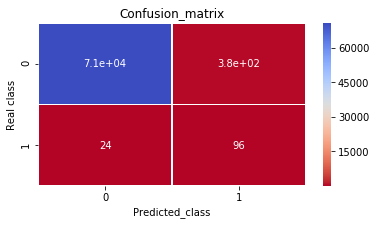

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.20      0.80      0.32       120

avg / total       1.00      0.99      1.00     71202

________________________________________________________________________________________________________



In [16]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    lr = LogisticRegression()
    prediction_algorithms(lr, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.7583333333333333
The accuracy is : 0.9976264711665402
TP 91
TN 70942
FP 140
FN 29


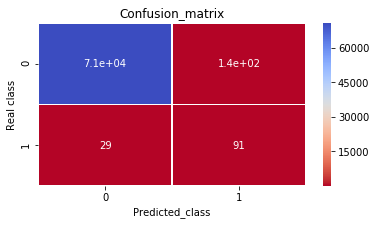

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.39      0.76      0.52       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.7416666666666667
The accuracy is : 0.9995646189713772
TP 89
TN 71082
FP 0
FN 31


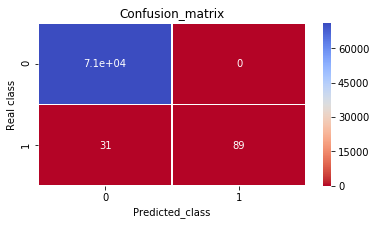

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       1.00      0.74      0.85       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.6833333333333333
The accuracy is : 0.9994663071262043
TP 82
TN 71082
FP 0
FN 38


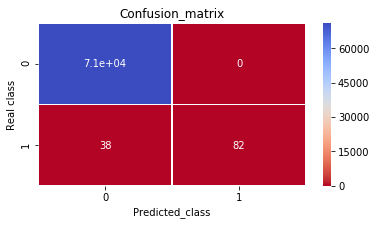

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       1.00      0.68      0.81       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [17]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    svm = SVC()
    prediction_algorithms(svm, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9666666666666667
The accuracy is : 0.9660543243167327
TP 116
TN 68669
FP 2413
FN 4


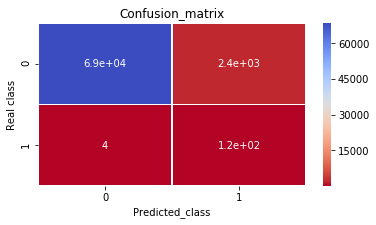

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     71082
          1       0.05      0.97      0.09       120

avg / total       1.00      0.97      0.98     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.95
The accuracy is : 0.9938484874020392
TP 114
TN 70650
FP 432
FN 6


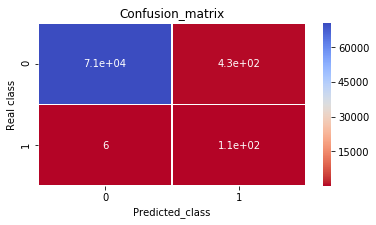

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.21      0.95      0.34       120

avg / total       1.00      0.99      1.00     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.9583333333333334
The accuracy is : 0.9952248532344597
TP 115
TN 70747
FP 335
FN 5


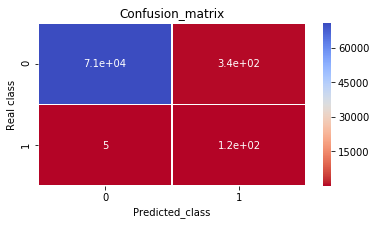

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.26      0.96      0.40       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [20]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    rf = RandomForestClassifier(n_estimators=100)
    prediction_algorithms(rf, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.975
The accuracy is : 0.9723041487598663
TP 117
TN 69113
FP 1969
FN 3


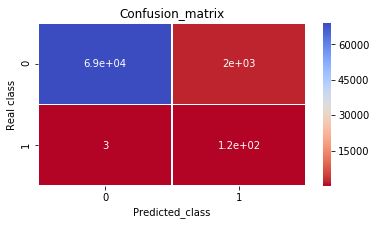

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     71082
          1       0.06      0.97      0.11       120

avg / total       1.00      0.97      0.98     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.9583333333333334
The accuracy is : 0.9754079941574675
TP 115
TN 69336
FP 1746
FN 5


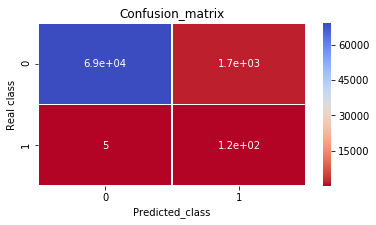

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     71082
          1       0.06      0.96      0.12       120

avg / total       1.00      0.98      0.99     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.9416666666666667
The accuracy is : 0.991559225864442
TP 113
TN 70488
FP 594
FN 7


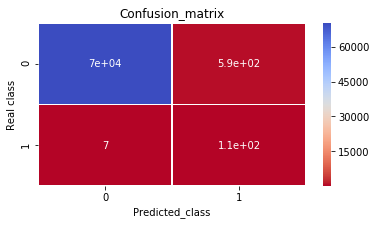

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.16      0.94      0.27       120

avg / total       1.00      0.99      0.99     71202

________________________________________________________________________________________________________



In [23]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    gbt = GradientBoostingClassifier()
    prediction_algorithms(gbt, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""